# Stock Market Analysis And Forecasting

A stock market or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses. These may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stock brokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

Stock market analysis and forecasting are essential components of financial analysis, helping investors and traders make informed decisions about buying, selling, or holding stocks. This field blends fundamental analysis, technical analysis, and statistical modeling to provide insights into the behavior of financial markets.


The task of stock prediction has always been a challenging problem for statistics experts. The main reason behind this challenge there is volatility in the stock market. Generally, there are two ways for stock market prediction.  Fundamental analysis is one of them and relies on a company's technique and fundamental information like market position, expenses and annual growth rates. The second one is the technical analysis method, which concentrates on previous stock prices and values.

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

In this project we have used various data visulizations libraries in python like **matplotlib**, **plotly**, and **seaborn**. For the prediction part, we have used **pytorch** and **gru**.

## Dataset Used

For this project we have used, stock prizes for 4 big companies -

 1. Google
 2. Microsoft
 3. IBM
 4. Amazon


# Analysis

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Reading **Google** data and displaying the first 5 records.

In [2]:
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

Reading **Microsoft** data and displaying the first 5 records.

In [3]:
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

Reading **Amazon** data and displaying the first 5 records.

In [4]:
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

Open   High    Low  Close   Volume  Name
Date                                                 
2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

Reading **IBM** data and displaying the first 5 records.

In [5]:
ibm = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM

Describing the **Google** data in terms of count, mean, std deviation, minimum value for all the features.

In [6]:
google.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.850000  5.211410e+05
25%     247.775000   250.190000   244.035000   247.605000  1.760854e+06
50%     310.480000   312.810000   307.790000   310.080000  2.517630e+06
75%     572.140000   575.975000   565.900000   570.770000  4.242182e+06
max    1083.020000  1086.490000  1072.270000  1085.090000  4.118289e+07

After describing the google dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

Displaying columns of **Google** data.

In [7]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

Displaying details of all the features in **Google** data.

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


From this, we can see that, there are 3019 records in the Google dataset.

Now, we will confirm the count of null records for all the features of **Google** dataset.

In [9]:
google.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

From this, we can see that there are no null values in the **Google** dataset.

Describing the **Microsoft** data in terms of count, mean, std deviation, minimum value for all the features.

In [10]:
microsoft.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     36.496817    36.827903    36.173190    36.513412  5.161762e+07
std      14.683337    14.742483    14.620057    14.694656  3.114958e+07
min      15.200000    15.620000    14.870000    15.150000  7.425603e+06
25%      26.785000    27.045000    26.535000    26.835000  3.136557e+07
50%      29.990000    30.230000    29.780000    30.000000  4.617529e+07
75%      44.545000    44.980000    44.090000    44.400000  6.322291e+07
max      87.120000    87.500000    86.230000    86.850000  5.910786e+08

Also same for the Microsoft dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

Displaying columns of **Microsoft** data.

In [11]:
microsoft.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

Displaying details of all the features in **Google** data.

In [12]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


From this, we can see that, there are 3019 records in the **Microsoft** dataset.

Now, we will confirm the count of null records for all the features of **Microsoft** dataset.

In [13]:
microsoft.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

From this, we can say that there are no null records in the dataset.

Describing the **Amazon** data in terms of count, mean, std deviation, minimum value for all the features.

In [14]:
amazon.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    299.335310   302.371163   296.037695   299.376231  5.931712e+06
std     280.120547   281.826442   277.927134   279.980161  5.122034e+06
min      26.090000    26.300000    25.760000    26.070000  9.864350e+05
25%      81.175000    82.580000    79.725000    81.090000  3.137037e+06
50%     205.330000   208.000000   202.100000   205.440000  4.724100e+06
75%     375.570000   379.155000   373.000000   375.140000  7.135246e+06
max    1204.880000  1213.410000  1191.150000  1195.830000  1.044046e+08

Displaying columns of **Amazon** data.

In [15]:
amazon.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

Displaying details of all the features in **Google** data.

In [16]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


From this, we can see that, there are 3019 records in the **Amazon** dataset. Also same for the **Amazon** dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

Now, we will confirm the count of null records for all the features of **Amazon** dataset.

In [17]:
amazon.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

From this, we can say that there are no null records in the dataset.

Describing the **IBM** data in terms of count, mean, std deviation, minimum value for all the features.

In [18]:
ibm.describe()

Open         High          Low        Close        Volume
count  3019.000000  3020.000000  3019.000000  3020.000000  3.020000e+03
mean    145.515545   146.681738   144.471597   145.617278  5.773301e+06
std      37.554946    37.613446    37.477641    37.529387  3.192831e+06
min      72.740000    73.940000    69.500000    71.740000  2.542560e+05
25%     116.405000   117.765000   115.490000   116.525000  3.622681e+06
50%     149.610000   150.330000   148.470000   149.315000  4.928852e+06
75%     178.445000   179.762500   177.330000   178.685000  6.965014e+06
max     215.380000   215.900000   214.300000   215.800000  3.077428e+07

But for the IBM dataset, we can see all the value is nearly close to the mean.

Displaying columns of **IBM** data.

In [19]:
ibm.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

Displaying details of all the features in **IBM** data.

In [20]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


From this, we can see that some features have 3020 records and some have 3019.

Now, we will confirm the count of null records for all the features of **IBM** dataset.

In [21]:
ibm.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

So, we can see that there is one row which has 2 null values. So, we will remove that record.

In [22]:
ibm.dropna(inplace=True)


We will confirm the count of null records again.

In [23]:
ibm.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

## Visualizations

### 1. Frequency distribution of Close feature for Google

First, we will display the frequency wise distribution of Close feature for the Google dataset by using histogram.

In [24]:
fig = px.histogram(google,
                   x='Close',
                   marginal='box',
                   nbins=50,
                   title='Distribution of Close for Google')
fig.update_layout(bargap=0.1, title_font=dict(size=16))
fig.show()

### 2. Frequency distribution of Open feature for Google

We will display the frequency wise distribution of Open feature for the Google dataset by using histogram.

In [25]:
fig = px.histogram(google,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1, title_font=dict(size=16))
fig.show()

### 3. Distribution of Close vs Open feature for Google

We will display the distribution of open vs close features for the Google dataset using scatter plot.

In [26]:
fig = px.scatter(google,
                 x='Open',
                 y='Close',
                 opacity=0.8,
                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

#### Displaying correlation for Google

We will display the correlation matrix for getting actual correlation details. From this, we can get more insights related to the dataset.

In [27]:
google.corr()

<ipython-input-27-d34dc0e37699>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Open      High       Low     Close    Volume
Open    1.000000  0.999894  0.999841  0.999742 -0.443155
High    0.999894  1.000000  0.999827  0.999866 -0.440717
Low     0.999841  0.999827  1.000000  0.999896 -0.447781
Close   0.999742  0.999866  0.999896  1.000000 -0.444590
Volume -0.443155 -0.440717 -0.447781 -0.444590  1.000000

### Stock Attributes



#### Google

Displaying all important attributes from Google Dataset for the years 2008 to 2018.

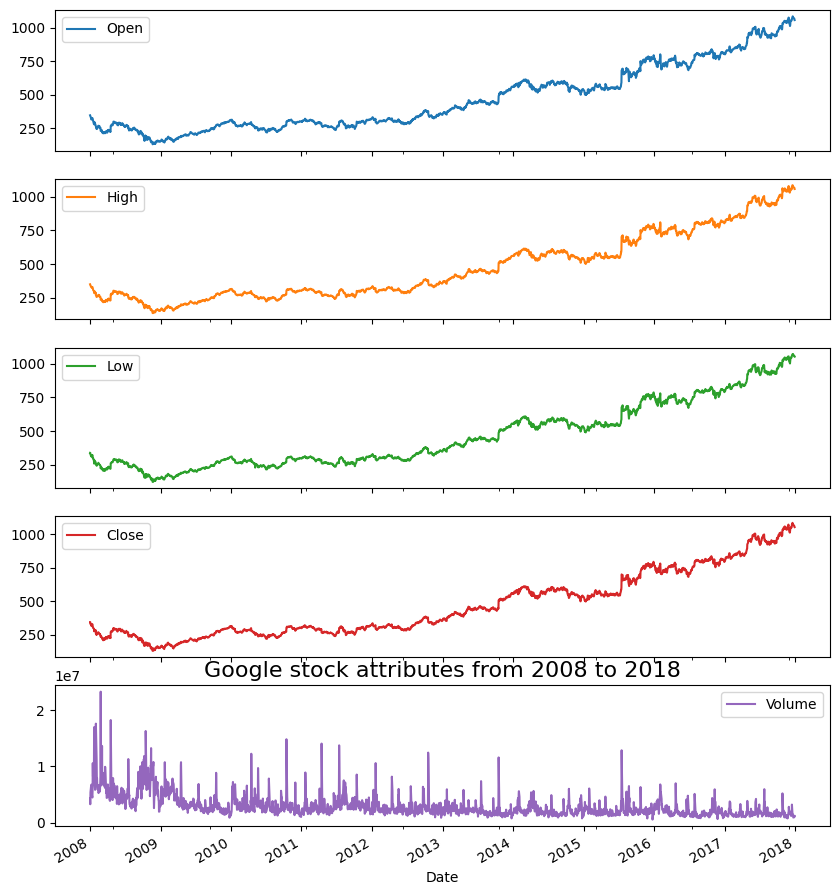

In [28]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018', fontdict={"fontsize": 16})
plt.show()

#### Microsoft

Displaying all important attributes from Microsoft Dataset for the years 2008 to 2018.

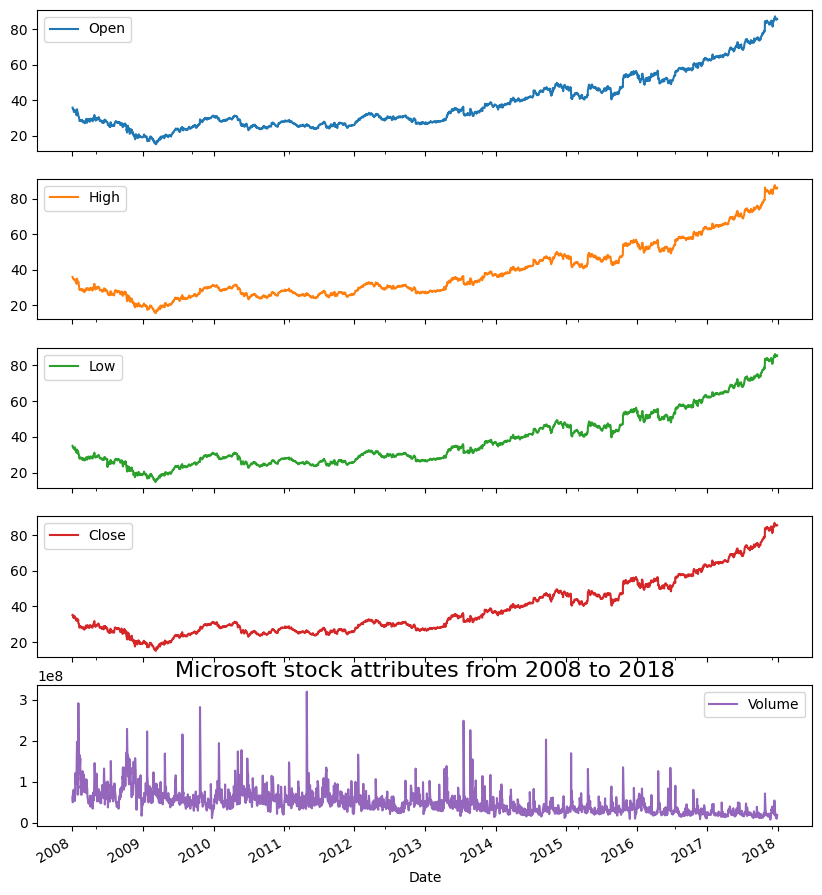

In [29]:
microsoft['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Microsoft stock attributes from 2008 to 2018', fontdict={"fontsize": 16})
plt.show()

#### Amazon

Displaying all important attributes from Amazon Dataset for the years 2008 to 2018.

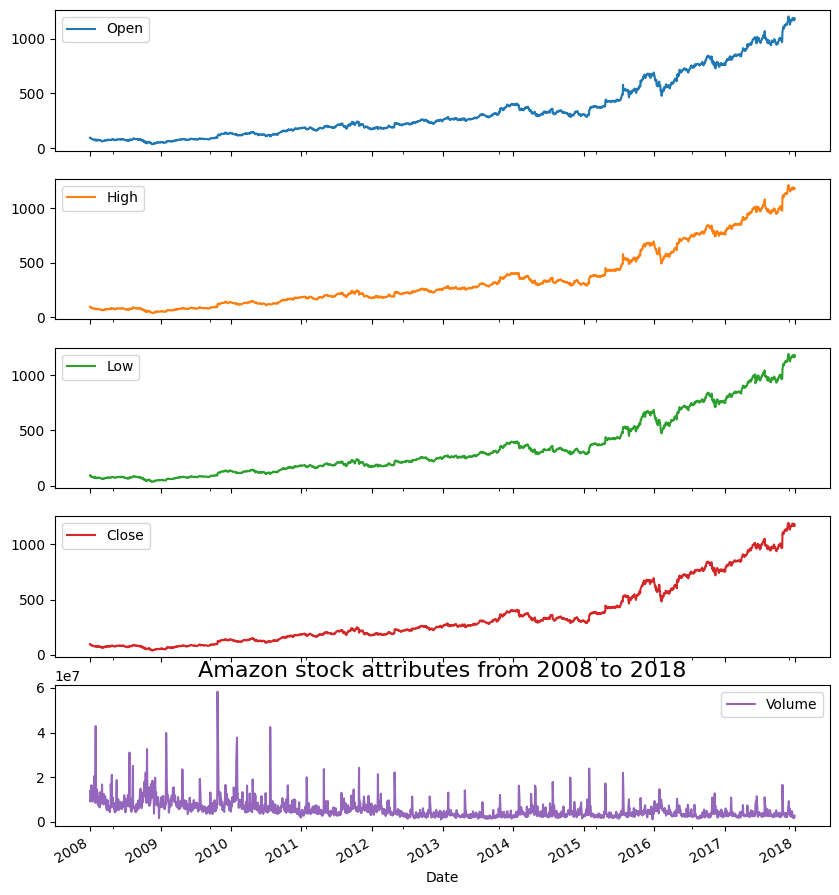

In [30]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018', fontdict={"fontsize": 16})
plt.show()

#### IBM

Displaying all important attributes from IBM Dataset for the years 2008 to 2018.

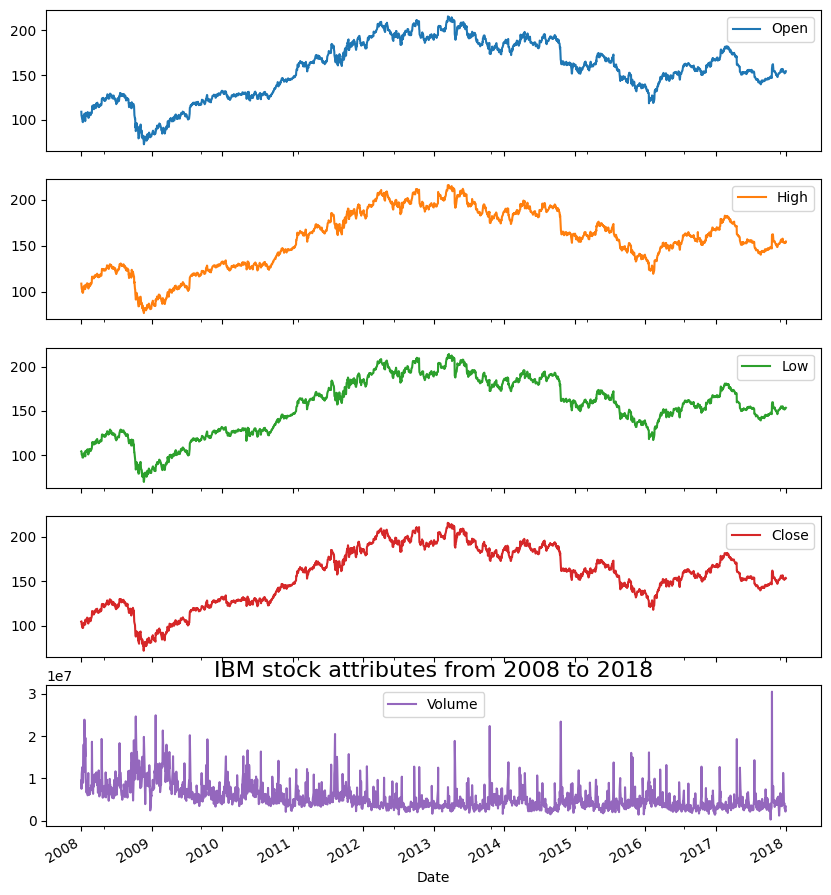

In [31]:
ibm['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2008 to 2018', fontdict={"fontsize": 16})
plt.show()

### High plot of all 4 companies

In this plot, we will plot the high values of all 4 companies within 2006 to 2018 period.

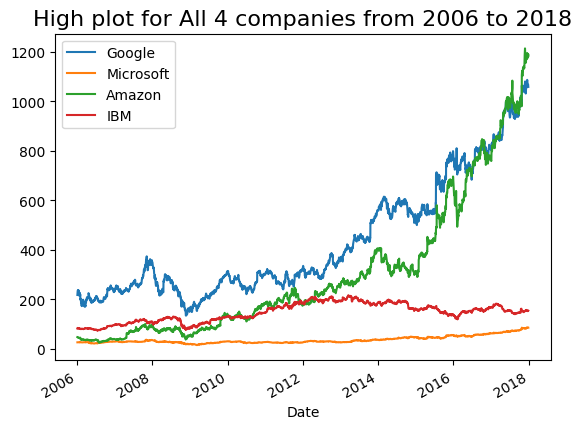

In [32]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.title('High plot for All 4 companies from 2006 to 2018', fontdict={"fontsize": 16})
plt.show()

As we can see here Microsoft's "High" value is very slowly increasing straight line. IBM's "High" value and Amazon's "High" value started from the approx same stage, even Amazon's "High" value was a bit lower but after 2012 Amazon's "High" value started to exponentially increase and slight drop for IBM's "High" value. Since 2016 there is a high fight going between Google's "High" value and Amazon's "High" value at 2018 Amazon's "High" value also beat Google's "High" value.

### High vs Expanding Mean vs Expanding Standard Deviation

We will display line graph of High values, Mean and Standard Deviation for all the companies one by one.

#### Microsoft

Here we will display the line graph for Microsoft dataset for the period 2006 and 2018.

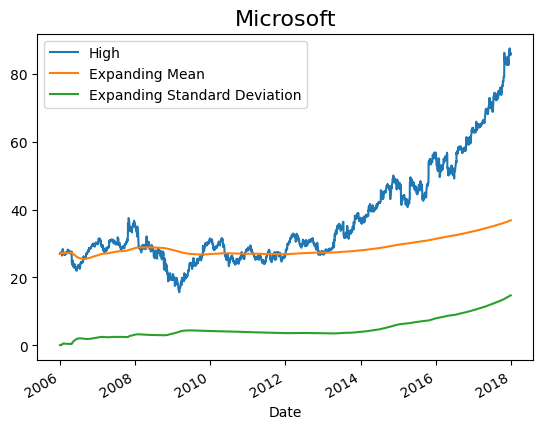

In [33]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Microsoft', fontdict={"fontsize": 16})
plt.show()

In Microsoft data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss.

#### Google

Here we will display the line graph for Google dataset for the period 2006 and 2018.

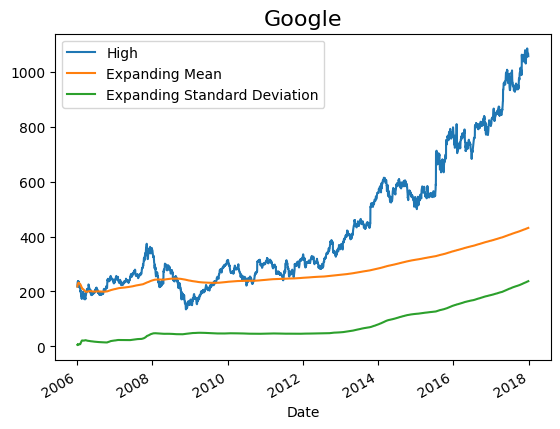

In [34]:
# Expanding window functions
google_mean = google.High.expanding().mean()
google_std = google.High.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google', fontdict={"fontsize": 16})
plt.show()

Same for Google data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. But it was not an as huge loss as Amazon.

#### IBM

Here we will display the line graph for IBM dataset for the period 2006 and 2018.

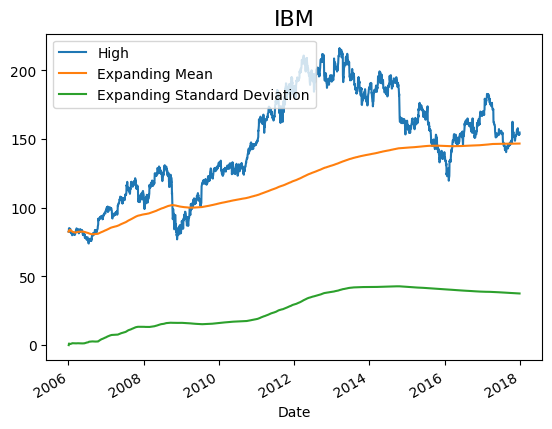

In [35]:
# Expanding window functions
ibm_mean = ibm.High.expanding().mean()
ibm_std = ibm.High.expanding().std()
ibm.High.plot()
ibm_mean.plot()
ibm_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('IBM', fontdict={"fontsize": 16})
plt.show()

Same for IBM data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss. And after 2013 again a drop then in 2016 there was a huge loss but after that, they were doing well. After just some profit again in between 2017, there was another drop.

#### Amazon

Here we will display the line graph for Amazon dataset for the period 2006 and 2018.

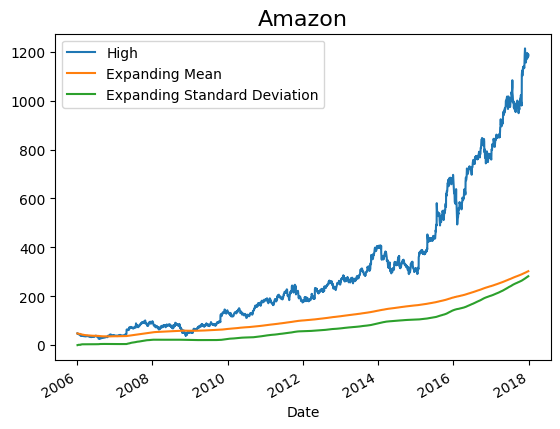

In [36]:
# Expanding window functions
amazon_mean = amazon.High.expanding().mean()
amazon_std = amazon.High.expanding().std()
amazon.High.plot()
amazon_mean.plot()
amazon_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon', fontdict={"fontsize": 16})
plt.show()

For Amazon's "High" value the case is different they also face loss in 2009 but for a very little margin. And after that their growth is in exponential order.

**Here we can see every company faced a loss in 2009, this might be because of the Global Financial Crisis that happened in 2008.**

### Close

We will display line graph of Close values, Mean and Standard Deviation for Google because Google seems to have the highest close value compared to other 3 companies.

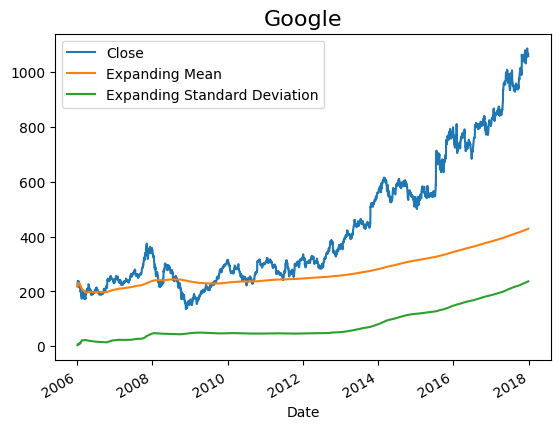

In [37]:
# Expanding window functions
google_mean = google.Close.expanding().mean()
google_std = google.Close.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google', fontdict={"fontsize": 16})
plt.show()

Importing various python libraries like **rcParams** and **statsmodels** for getting more details related to statistics and displaying plots.

In [38]:
from pylab import rcParams
import statsmodels.api as sm

### Trend and Seasonality for High column

Here, we will decomposes a time series of the 'High' column in the DataFrames for all 4 companies into its trend, seasonality, and residual components and then displays a line plot of these components. This can be useful for understanding the underlying patterns and trends in the data.

#### Google

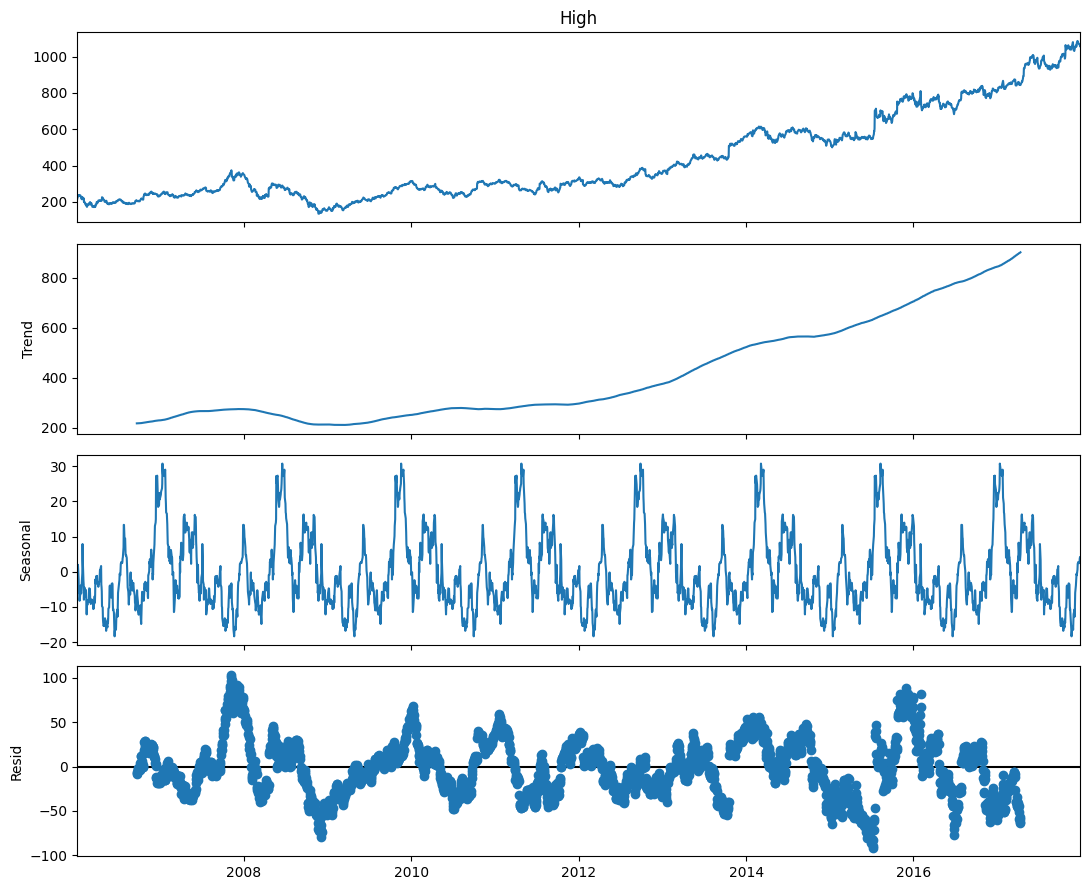

In [39]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],period=360) # The frequency is annual
figure = decomposed_google_volume.plot()
plt.show()

There is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

#### Microsoft

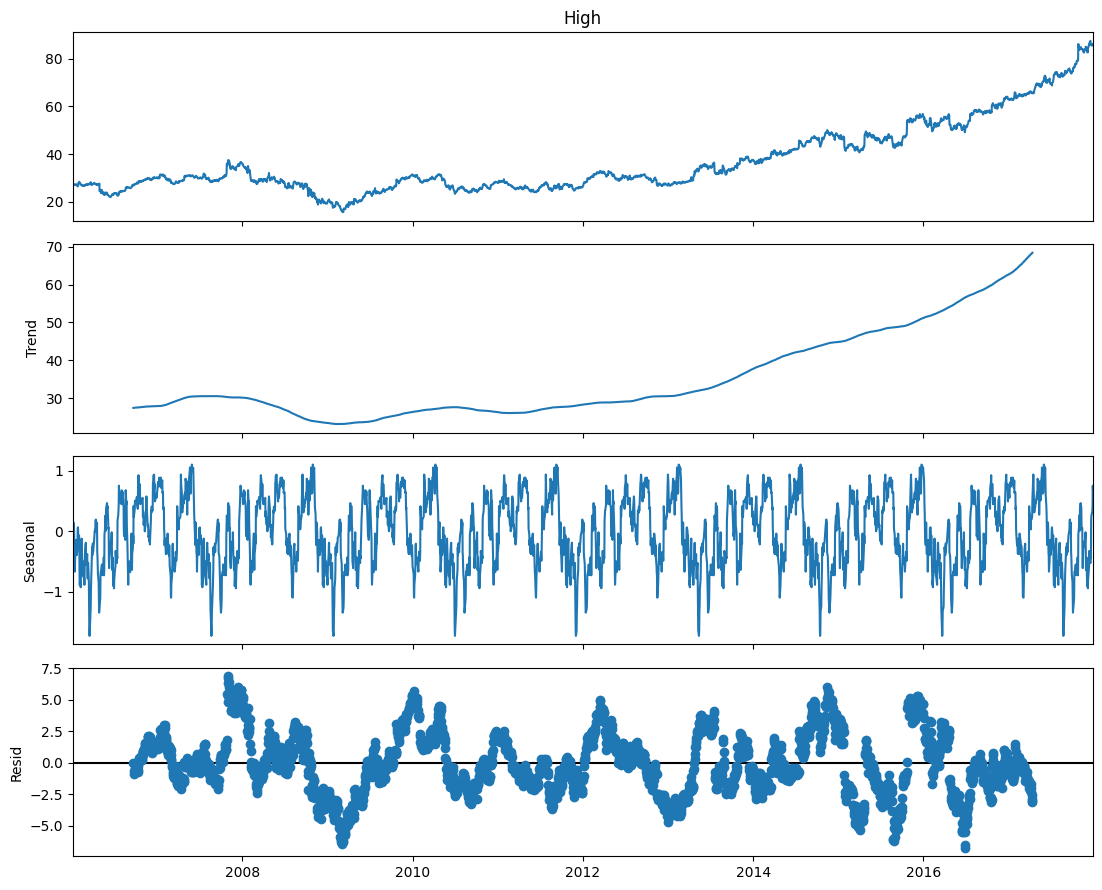

In [40]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["High"],period=360) # The frequency is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

Same for Microsoft data, there is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

#### IBM

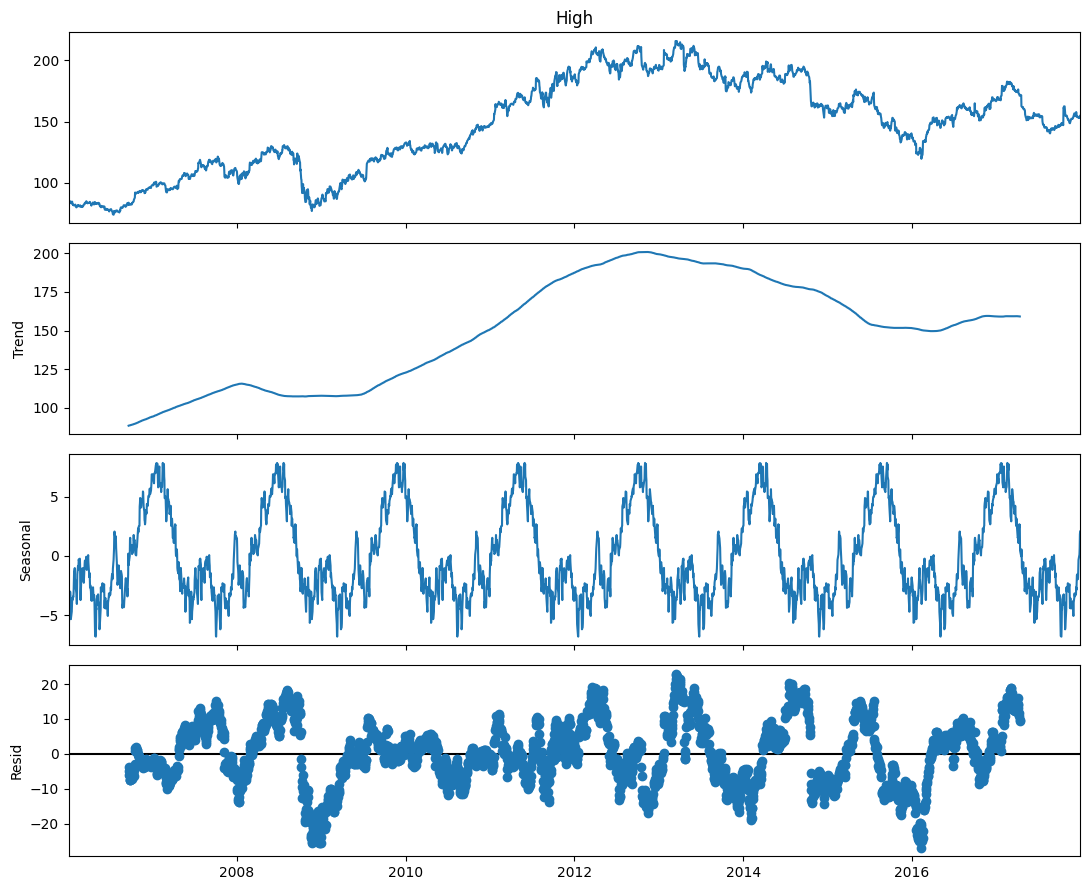

In [41]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"],period=360) # The frequency is annual
figure = decomposed_ibm_volume.plot()
plt.show()

IBM data has a very slow increasing trend until 2008, but after 2009 there was an exponential high trend until 2013, then a high drop until 2016 then a very slow increasing trend. And very high seasonality.

#### Amazon

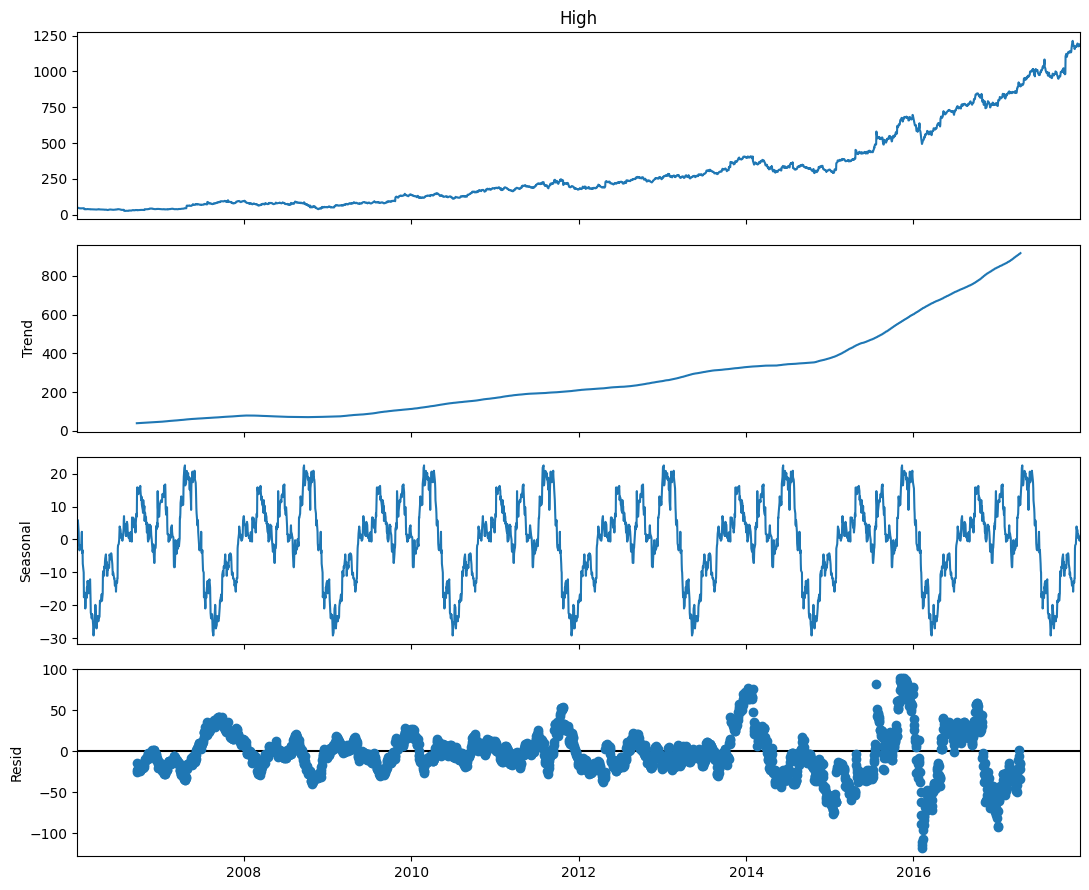

In [42]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"],period=360) # The frequency is annual
figure = decomposed_amazon_volume.plot()
plt.show()

Amazon data is similar to Google data.

### Trend and Seasonality for Close column

Here, we will decomposes a time series of the 'Close' column in the DataFrames for all 4 companies into its trend, seasonality, and residual components and then displays a line plot of these components. This can be useful for understanding the underlying patterns and trends in the data.

#### Google

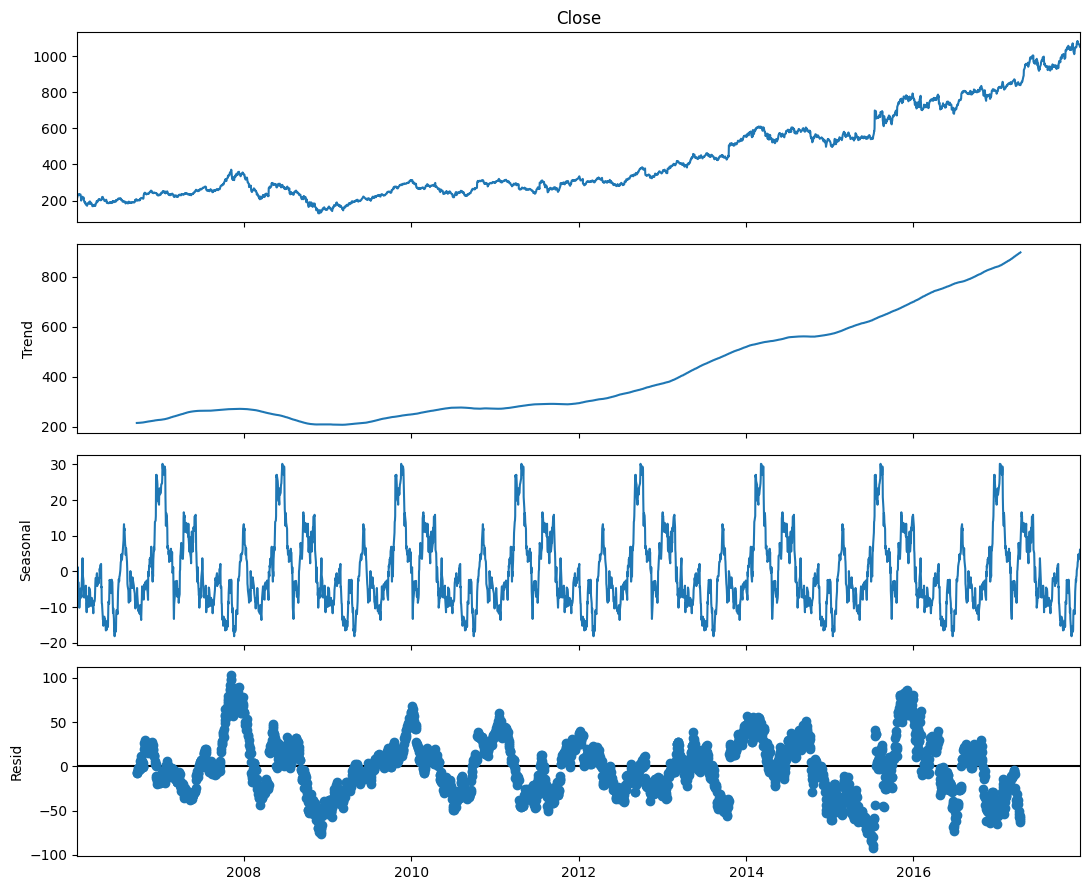

In [43]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["Close"],period=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

#### Microsoft

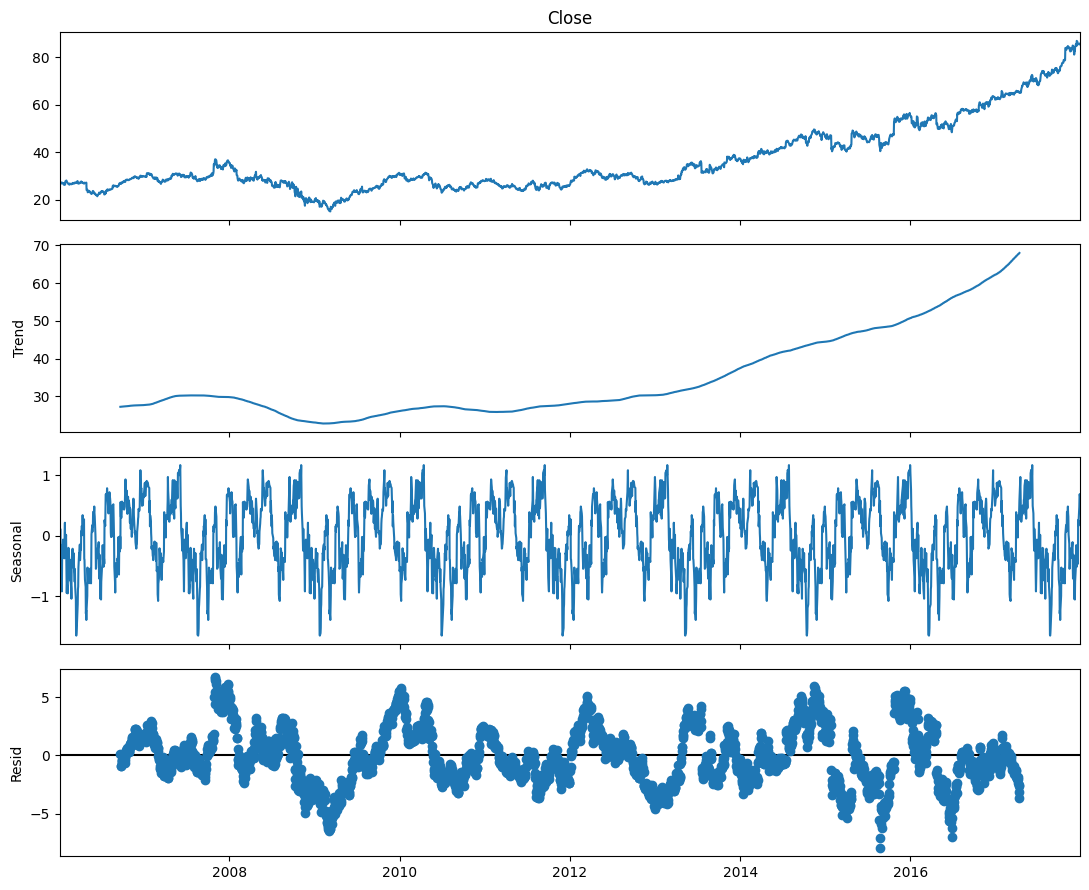

In [44]:
rcParams['figure.figsize'] = 11, 9
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["Close"],period=360) # The frequncy is annual
figure = decomposed_microsoft_volume.plot()
plt.show()

#### Amazon

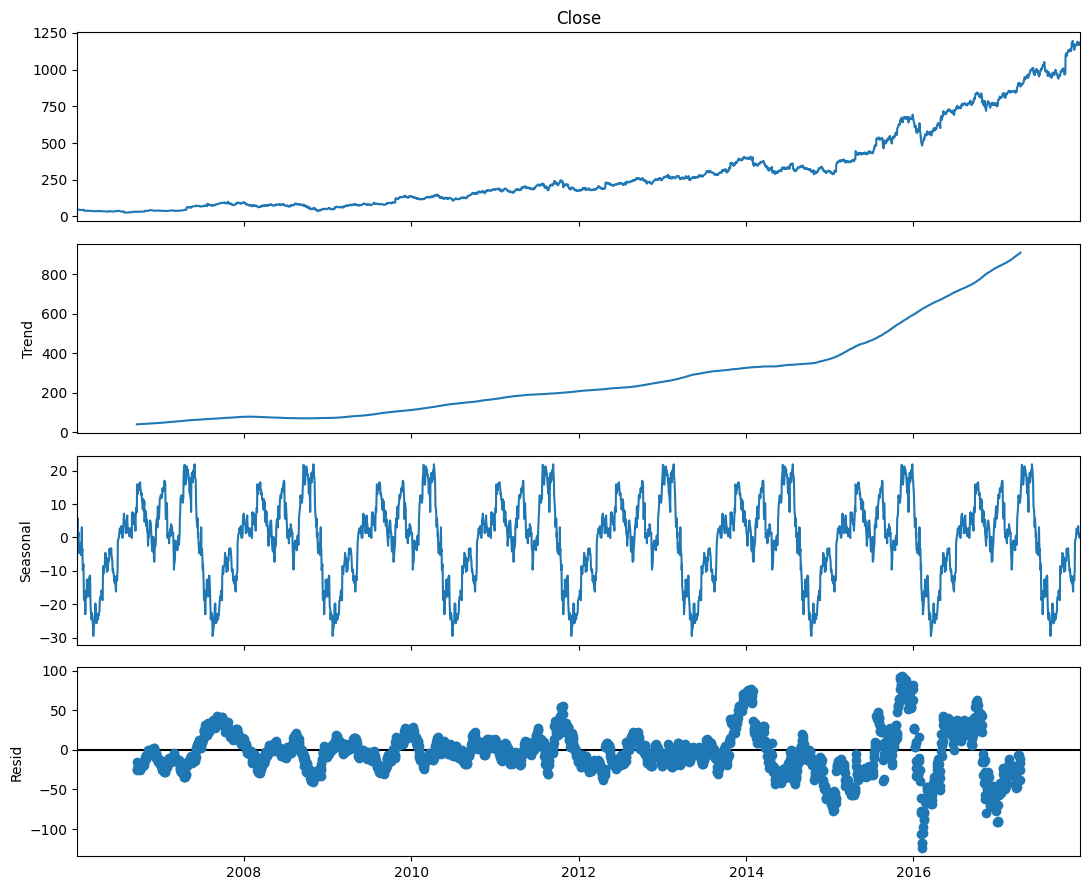

In [45]:
rcParams['figure.figsize'] = 11, 9
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["Close"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()
plt.show()

#### IBM

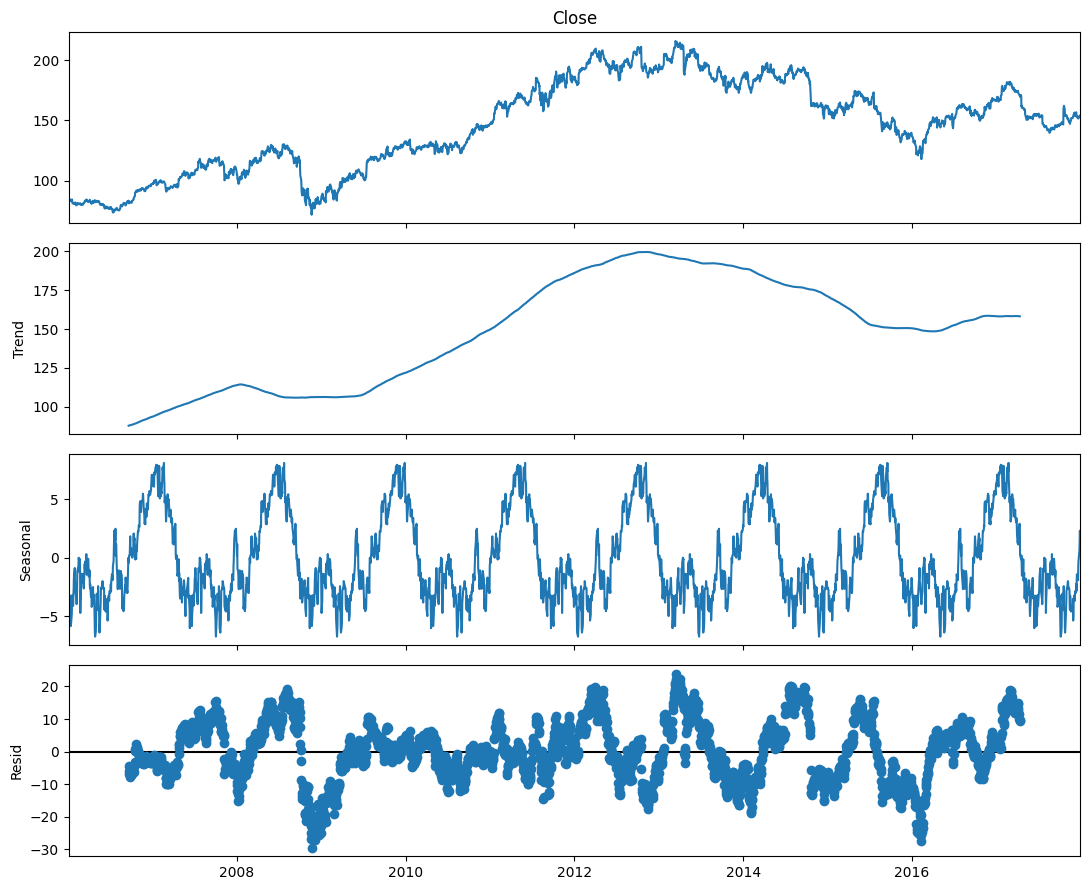

In [46]:
rcParams['figure.figsize'] = 11, 9
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["Close"],period=360) # The frequncy is annual
figure = decomposed_ibm_volume.plot()
plt.show()

Because there have a very strong correlation between Close and High, we can see the trend and seasonality is very similar.

# Prediction

## Time Series Forecasting:

Time series forecasting is a statistical and data analysis technique used to make predictions about future data points in a time-ordered sequence. It is a valuable tool in various fields, including finance, economics, weather forecasting, sales, and many others where understanding and predicting trends over time is important.

Here, we are using this Time Series Forcasting for Stock prize trend for 4 big companies. Please note that, as with all forecasting methods, success is not guaranteed.



## GRU Model:
Gated recurrent unit  is essentially a simplified LSTM(Long Short-Term Memory). It has
the exact same role in the network. The main difference is in the number of
gates and weights — GRU is somewhat simpler. It has 2 gates. Since it does
not have an output gate, there is no control over the memory content. The
update gate controls the information flow from the previous activation, and
the addition of new information as well, while the reset gate is inserted
into the candidate activation.



<img src='https://d2l.ai/_images/gru-1.svg' />


By using GRU time series forecasting we will forcaste and check.

### Displaying Close prizes

First we will display the head of the each dataset and then we will display the close prizes of all 4 companies using separate line plots.

#### Amazon

In [47]:

filepath = 'AMZN_2006-01-01_to_2018-01-01.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()


Date   Open   High    Low  Close   Volume  Name
0  2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1  2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2  2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
3  2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
4  2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

Plotting the graph -

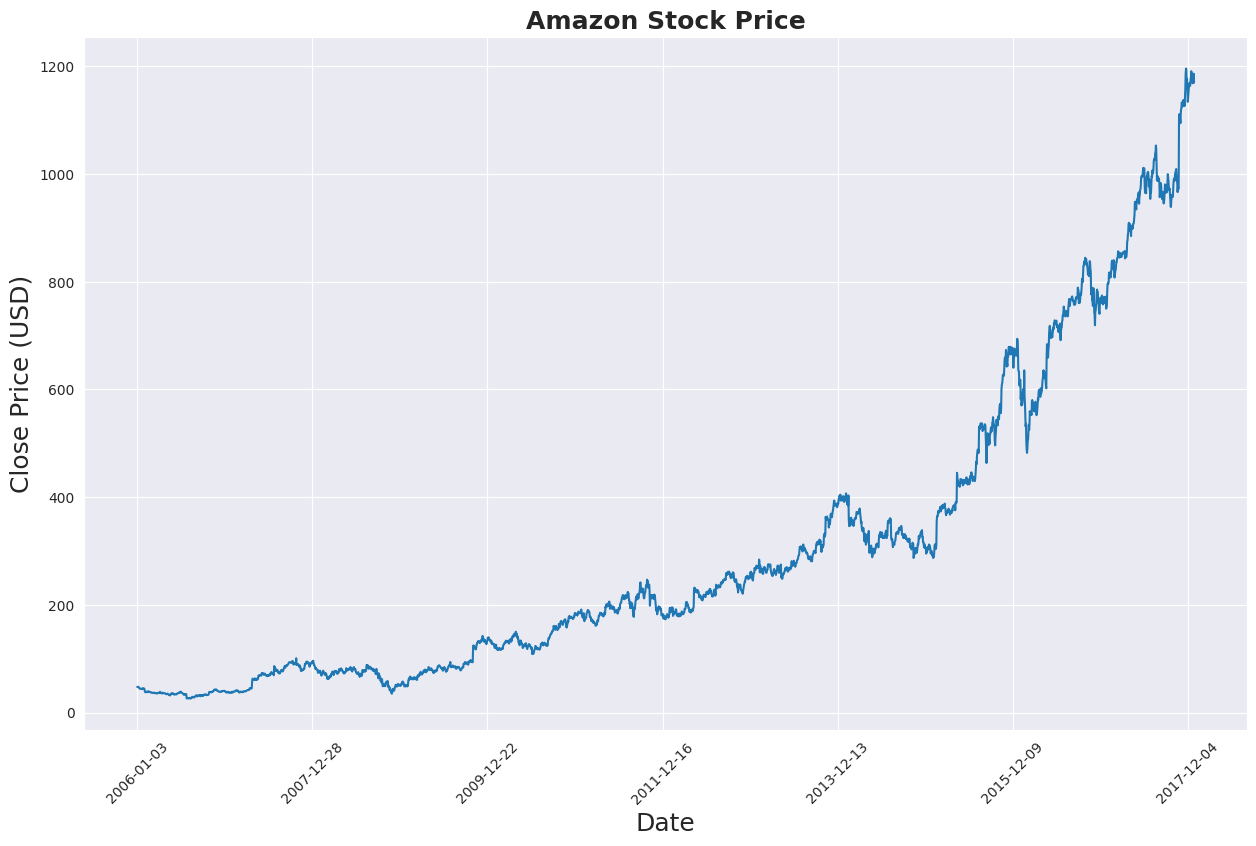

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

#### Google

In [49]:

filepath = 'GOOGL_2006-01-01_to_2018-01-01.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

Date    Open    High     Low   Close    Volume   Name
0  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
1  2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2  2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
3  2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
4  2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

Plotting the graph -

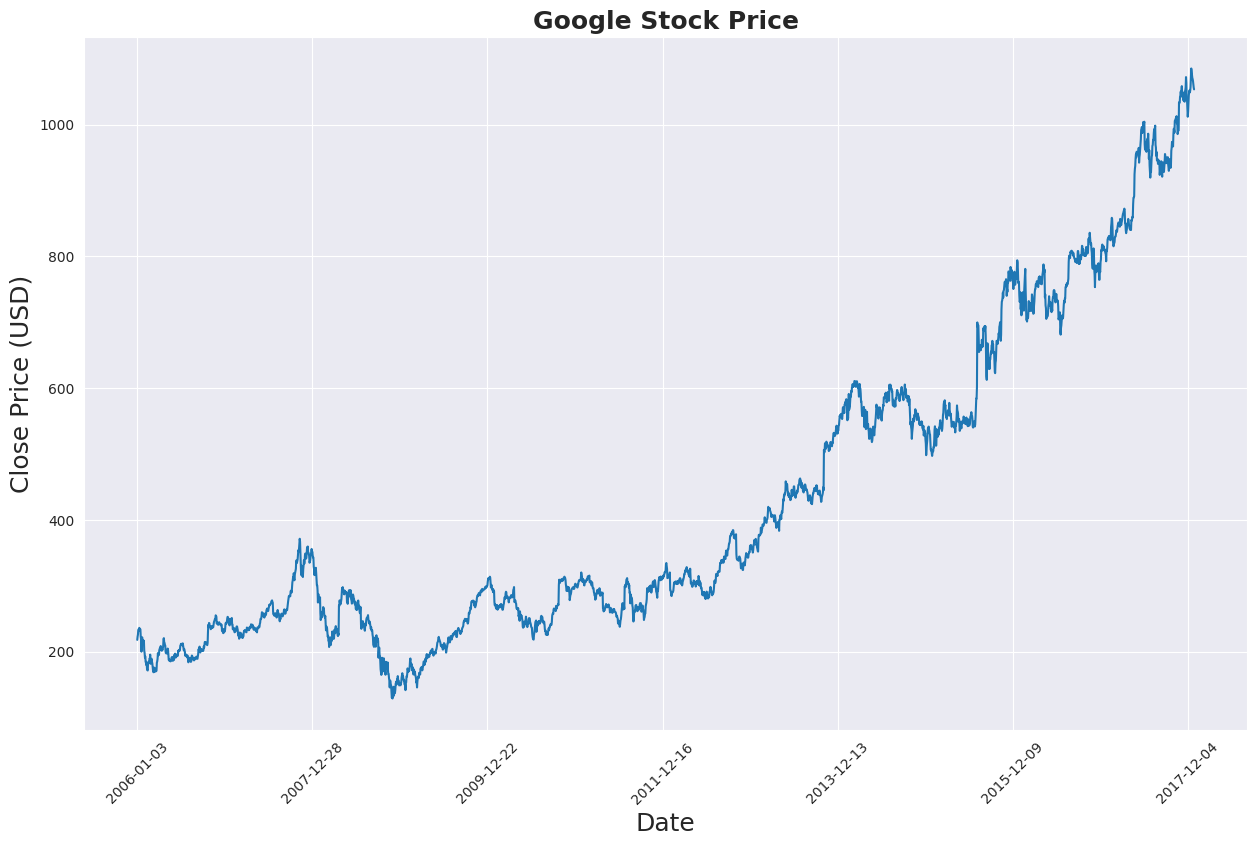

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_google[['Close']])
plt.xticks(range(0,data_google.shape[0],500),data_google['Date'].loc[::500],rotation=45)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

#### IBM

In [51]:
filepath = 'IBM_2006-01-01_to_2018-01-01.csv'
data_ibm = pd.read_csv(filepath)
data_ibm = data_ibm.sort_values('Date')
data_ibm.head()

Date   Open   High    Low  Close    Volume Name
0  2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
1  2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2  2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
3  2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
4  2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM

We need to remove null values as we did earlier.

In [52]:
data_ibm.dropna(inplace=True)

Plotting the graph -

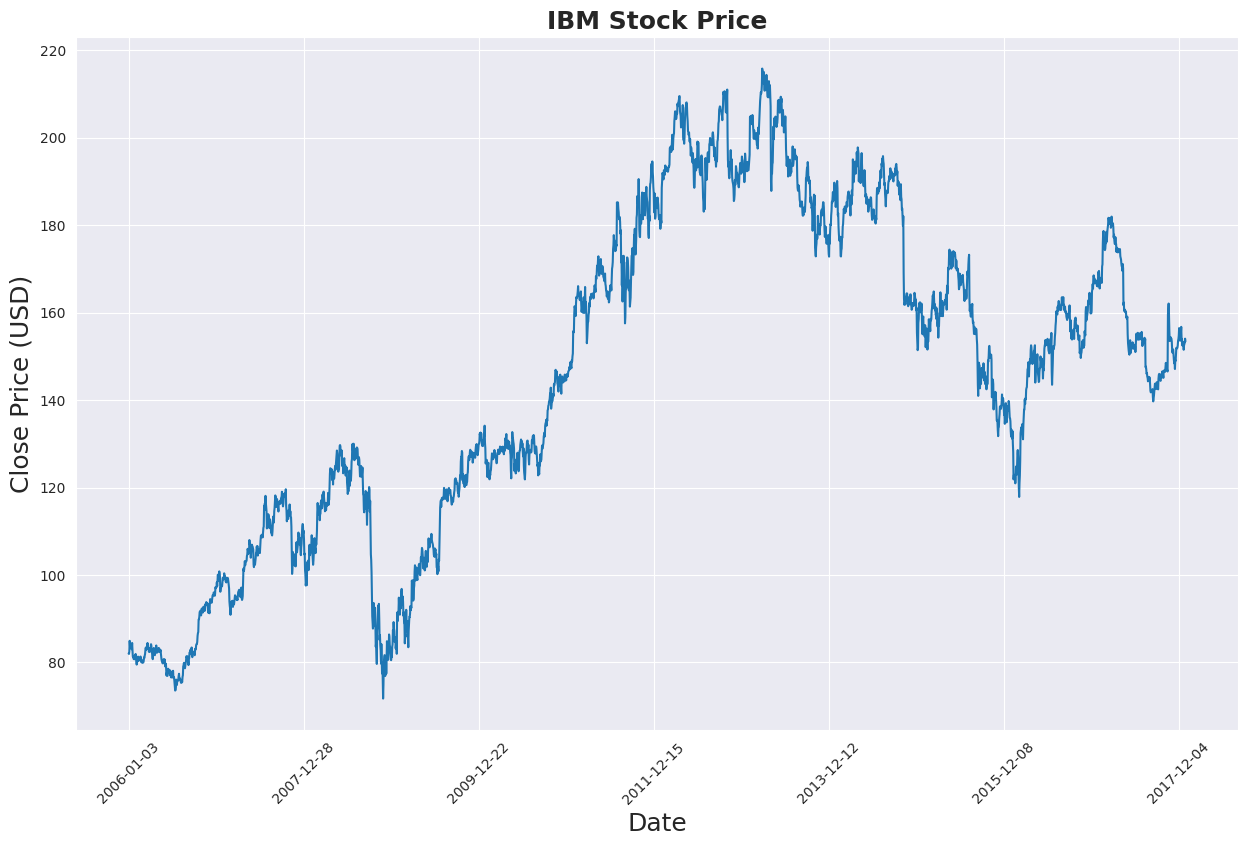

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ibm[['Close']])
plt.xticks(range(0,data_ibm.shape[0],500),data_ibm['Date'].loc[::500],rotation=45)
plt.title("IBM Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

#### Microsoft

In [54]:
filepath = 'MSFT_2006-01-01_to_2018-01-01.csv'
data_microsoft = pd.read_csv(filepath)
data_microsoft = data_microsoft.sort_values('Date')
data_microsoft.head()

Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3  2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4  2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

Plotting the graph -

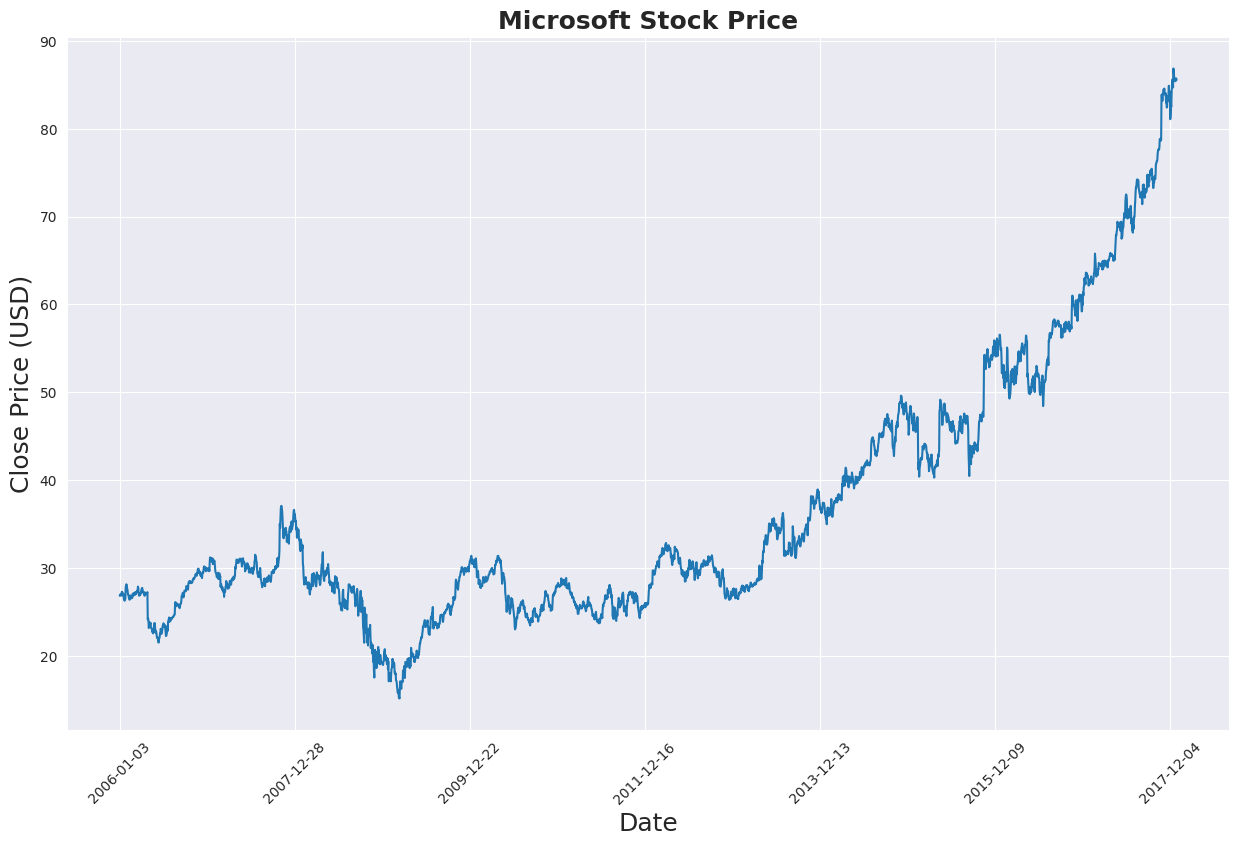

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_microsoft[['Close']])
plt.xticks(range(0,data_microsoft.shape[0],500),data_microsoft['Date'].loc[::500],rotation=45)
plt.title("Microsoft Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

## Split the data

Now, we will define a function to split the data into train and test data.

In [56]:

def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

## Amazon



Displaying information related to Close column of the Amazon dataset -

In [57]:
price_amazon = data_amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


### Data Preprocessing

Here, we will use MinMaxScaler to perform data preprocessing. We will transform 'Close' column from the dataset.

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

<ipython-input-58-aa33d90e1d28>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Call split function

Now, we will split the data for **Amazon** by calling the split_data function that we created earlier.

In [59]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


From this, we can see that, there are 2399 records for training and 600 records for testing in the dataset.

### Training

Next, we will import pytorch for training the model using Neural Network.

We will convert x_train, x_test, y_train, and y_test into PyTorch tensors. After converting, we have stored them in the same variables.

In [60]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

Next, we will set hyperparameters for the model.

In [61]:
input_dim = 1       # input dimensions
hidden_dim = 32     # neurons in each hidden layer
num_layers = 2      # no. of hidden layers
output_dim = 1      # output dimensions
num_epochs = 105    # no. of training epochs

Next we will create a class GRU, in which we will create the training model using PyTorch and above hyperparameters.

In [62]:

class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

Above code has defined a custom GRU-based neural network model suitable for sequence-to-sequence tasks, where the input sequence is processed through one or more GRU layers, and the final output is obtained through a fully connected layer.

Now, we will initialize a neural network model. Here, we will use a loss function (criterion) for training, and an optimizer (optimiser) with the **Adam** **algorithm** and a specified learning rate of **0.01**.

In [63]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

Now, we will train the model finally for num_epochs that we set earlier.

In [64]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.3170686364173889
Epoch  1 MSE:  0.0634312853217125
Epoch  2 MSE:  0.09343023598194122
Epoch  3 MSE:  0.06695283204317093
Epoch  4 MSE:  0.02970709465444088
Epoch  5 MSE:  0.03913378342986107
Epoch  6 MSE:  0.05315692350268364
Epoch  7 MSE:  0.05192553251981735
Epoch  8 MSE:  0.039521608501672745
Epoch  9 MSE:  0.02714567258954048
Epoch  10 MSE:  0.024928145110607147
Epoch  11 MSE:  0.03251153603196144
Epoch  12 MSE:  0.034877412021160126
Epoch  13 MSE:  0.02718971110880375
Epoch  14 MSE:  0.019730811938643456
Epoch  15 MSE:  0.01918642781674862
Epoch  16 MSE:  0.02264554798603058
Epoch  17 MSE:  0.023795969784259796
Epoch  18 MSE:  0.019814882427453995
Epoch  19 MSE:  0.013559585437178612
Epoch  20 MSE:  0.010787902399897575
Epoch  21 MSE:  0.01314547285437584
Epoch  22 MSE:  0.013188193552196026
Epoch  23 MSE:  0.007148424629122019
Epoch  24 MSE:  0.003561117686331272
Epoch  25 MSE:  0.0062890914268791676
Epoch  26 MSE:  0.005643617827445269
Epoch  27 MSE:  0.00042496

### Training Visulizations

Now, we will convert PyTorch sensors back to NumPy arrays. It will be useful for doing some visualizations.

In [65]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

Now, we will plot original data and model's training predictions in one subplot and training loss over epochs in the second subplot. We will use Seaborn library for these plots.

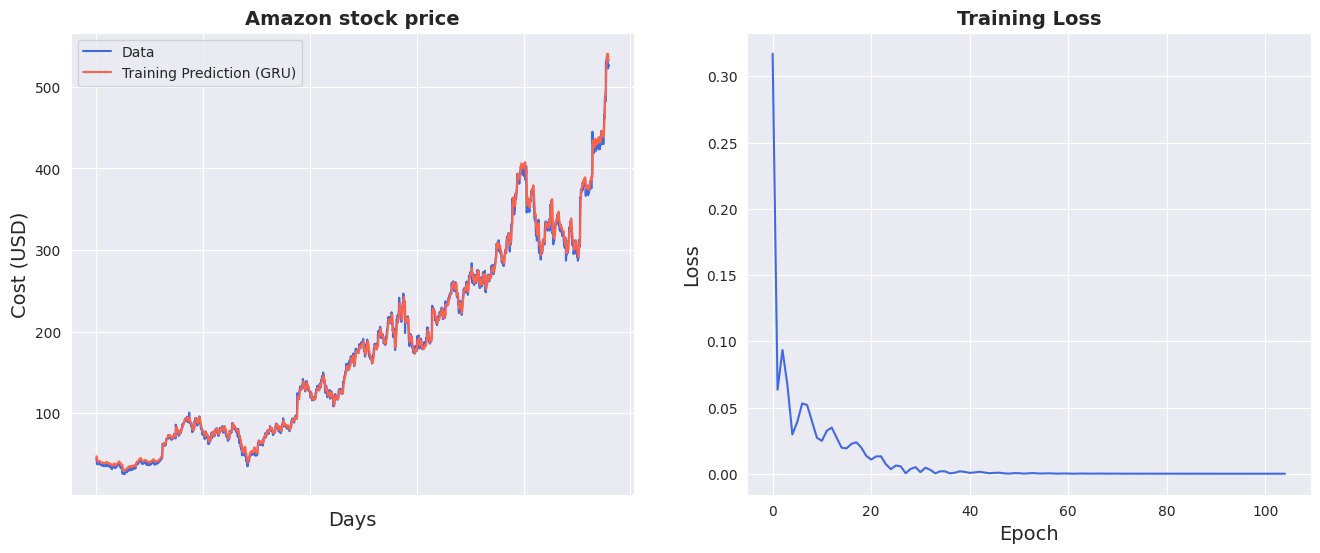

In [66]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

From the first subplot, we can see that, our predictions are quite similar to the original data. Also, from the second subplot, we can see that, loss was higher for starting epochs, as model gets trained, loss decreases.

### Prediction

Next, we will make the predictions using test data. We will also calculate RMSE for both training and test datasets and then we will use those values for further analysis or reporting. The RMSE is a measure of the model's accuracy, with lower values indicating better performance.

In [67]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 5.57 RMSE
Test Score: 44.04 RMSE


### Testing Visulizations

After that, we will prepare data for plotting time series predictions, combining the original data with model predictions for visualization.

In [68]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_amazon)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_amazon)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_amazon)-1, :] = y_test_pred

original = scaler.inverse_transform(price_amazon['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

Next, we will create an interactive plot using Plotly to visualize the predictions of an Amazon stock price model alongside the actual values. The plot consists of line plots for training predictions, test predictions, and actual values. It also features a dark theme and a title annotation for clarity and aesthetics.

In [69]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Amazon Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

From this, we can say that, test predictions and actual value are quite close.

##  Google



Displaying information related to Close column of the Amazon dataset -

In [70]:
price_google = data_google[['Close']]
price_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


### Data Preprocessing

Here, we will use MinMaxScaler to perform data preprocessing. We will transform 'Close' column from the dataset.

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_google['Close'] = scaler.fit_transform(price_google['Close'].values.reshape(-1,1))

<ipython-input-71-7909ce3880b7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Call split function

Now, we will split the data for **Google** by calling the split_data function that we created earlier.

In [72]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_google, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


From this, we can see that, there are 2399 records for training and 600 records for testing in the dataset.

### Training

Next, we will import pytorch for training the model using Neural Network.

We will convert x_train, x_test, y_train, and y_test into PyTorch tensors. After converting, we have stored them in the same variables.

In [73]:

import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

We will use the same hyperparameters and GRU class for creating the model.

Now, we will initialize a neural network model. Here, we will use a loss function (criterion) for training, and an optimizer (optimiser) with the **Adam** **algorithm** and a specified learning rate of **0.01**.

In [74]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

Now, we will train the model finally for num_epochs that we set earlier.

In [75]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.4021584093570709
Epoch  1 MSE:  0.12154277414083481
Epoch  2 MSE:  0.07698585093021393
Epoch  3 MSE:  0.10993296653032303
Epoch  4 MSE:  0.06337186694145203
Epoch  5 MSE:  0.05256706848740578
Epoch  6 MSE:  0.0653252825140953
Epoch  7 MSE:  0.07135133445262909
Epoch  8 MSE:  0.06352217495441437
Epoch  9 MSE:  0.048610709607601166
Epoch  10 MSE:  0.03718625009059906
Epoch  11 MSE:  0.036597076803445816
Epoch  12 MSE:  0.04244207218289375
Epoch  13 MSE:  0.04101335257291794
Epoch  14 MSE:  0.030137723311781883
Epoch  15 MSE:  0.02036954276263714
Epoch  16 MSE:  0.018130287528038025
Epoch  17 MSE:  0.019692761823534966
Epoch  18 MSE:  0.017696643248200417
Epoch  19 MSE:  0.009985270909965038
Epoch  20 MSE:  0.0027943600434809923
Epoch  21 MSE:  0.004327553324401379
Epoch  22 MSE:  0.00838128849864006
Epoch  23 MSE:  0.003944235388189554
Epoch  24 MSE:  0.002159466501325369
Epoch  25 MSE:  0.007616592571139336
Epoch  26 MSE:  0.008387738838791847
Epoch  27 MSE:  0.00387665

### Training Visulizations

Now, we will convert PyTorch sensors back to NumPy arrays. It will be useful for doing some visualizations.

In [76]:

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

Now, we will plot original data and model's training predictions in one subplot and training loss over epochs in the second subplot. We will use Seaborn library for these plots.

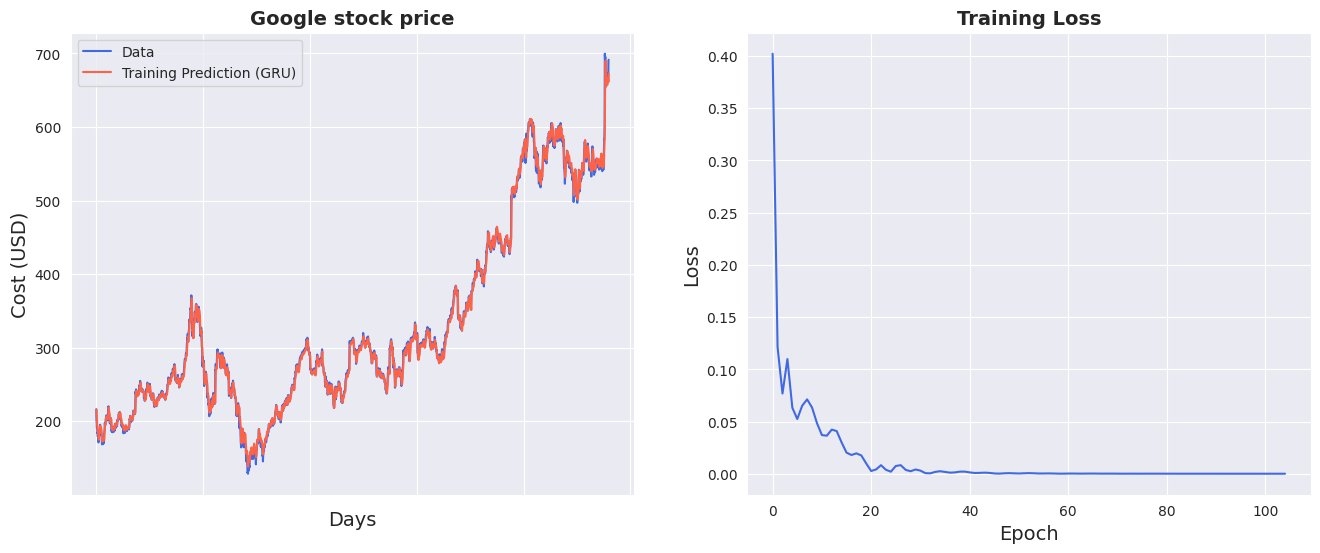

In [77]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Google stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

From the first subplot, we can see that, our predictions are quite similar to the original data. Also, from the second subplot, we can see that, loss was higher for starting epochs, as model gets trained, loss decreases.

### Prediction

Next, we will make the predictions using test data. We will also calculate RMSE for both training and test datasets and then we will use those values for further analysis or reporting. The RMSE is a measure of the model's accuracy, with lower values indicating better performance.

In [78]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 6.77 RMSE
Test Score: 48.10 RMSE


### Testing Visulizations

After that, we will prepare data for plotting time series predictions, combining the original data with model predictions for visualization.

In [79]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

Next, we will create an interactive plot using Plotly to visualize the predictions of an Google stock price model alongside the actual values. The plot consists of line plots for training predictions, test predictions, and actual values. It also features a dark theme and a title annotation for clarity and aesthetics.

In [80]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Google Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

From this, we can say that, test predictions and actual value are quite close.

##  IBM



Displaying information related to Close column of the Amazon dataset -

In [81]:

price_ibm = data_ibm[['Close']]
price_ibm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


### Data Preprocessing

Here, we will use MinMaxScaler to perform data preprocessing. We will transform 'Close' column from the dataset.

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_ibm['Close'] = scaler.fit_transform(price_ibm['Close'].values.reshape(-1,1))

<ipython-input-82-9915b8518dae>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Call split function

Now, we will split the data for **Google** by calling the split_data function that we created earlier.

In [83]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_ibm, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


From this, we can see that, there are 2399 records for training and 600 records for testing in the dataset.

### Training

Next, we will import pytorch for training the model using Neural Network.

We will convert x_train, x_test, y_train, and y_test into PyTorch tensors. After converting, we have stored them in the same variables.

In [84]:

import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

We will use the same hyperparameters and GRU class for creating the model.

In [85]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

Now, we will initialize a neural network model. Here, we will use a loss function (criterion) for training, and an optimizer (optimiser) with the **Adam** **algorithm** and a specified learning rate of **0.01**.

In [86]:

model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

Now, we will train the model finally for num_epochs that we set earlier.

In [87]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.3264210820198059
Epoch  1 MSE:  0.22706681489944458
Epoch  2 MSE:  0.11495000869035721
Epoch  3 MSE:  0.02294253557920456
Epoch  4 MSE:  0.07016459107398987
Epoch  5 MSE:  0.0443546324968338
Epoch  6 MSE:  0.003269611857831478
Epoch  7 MSE:  0.011084191501140594
Epoch  8 MSE:  0.02663671225309372
Epoch  9 MSE:  0.03275787830352783
Epoch  10 MSE:  0.028132909908890724
Epoch  11 MSE:  0.01658584736287594
Epoch  12 MSE:  0.005334446206688881
Epoch  13 MSE:  0.001929154503159225
Epoch  14 MSE:  0.0075941127724945545
Epoch  15 MSE:  0.014536912553012371
Epoch  16 MSE:  0.013994705863296986
Epoch  17 MSE:  0.006929870694875717
Epoch  18 MSE:  0.0018823990831151605
Epoch  19 MSE:  0.0022831130772829056
Epoch  20 MSE:  0.005285258870571852
Epoch  21 MSE:  0.0077493563294410706
Epoch  22 MSE:  0.008134657517075539
Epoch  23 MSE:  0.006210325285792351
Epoch  24 MSE:  0.0032501418609172106
Epoch  25 MSE:  0.0014053017366677523
Epoch  26 MSE:  0.0017292096745222807
Epoch  27 MSE: 

### Training Visulizations

Now, we will convert PyTorch sensors back to NumPy arrays. It will be useful for doing some visualizations.

In [88]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

Now, we will plot original data and model's training predictions in one subplot and training loss over epochs in the second subplot. We will use Seaborn library for these plots.

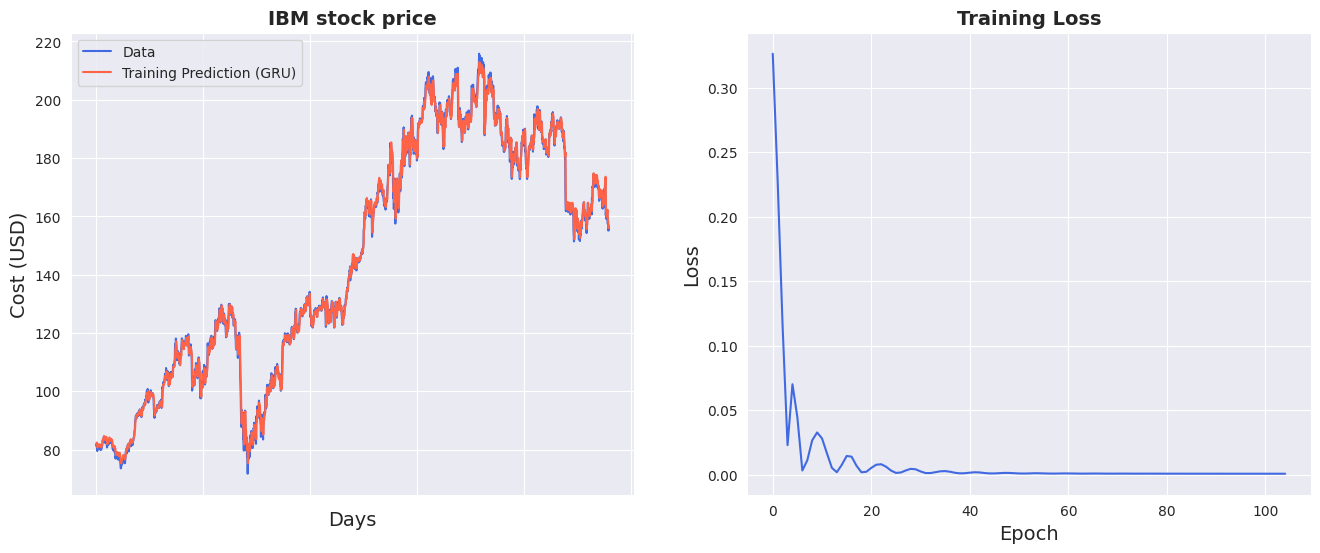

In [89]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('IBM stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

From the first subplot, we can see that, our predictions are quite similar to the original data. Also, from the second subplot, we can see that, loss was higher for starting epochs, as model gets trained, loss decreases.

### Prediction

Next, we will make the predictions using test data. We will also calculate RMSE for both training and test datasets and then we will use those values for further analysis or reporting. The RMSE is a measure of the model's accuracy, with lower values indicating better performance.

In [90]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 2.00 RMSE
Test Score: 1.91 RMSE


### Testing Visulizations

After that, we will prepare data for plotting time series predictions, combining the original data with model predictions for visualization.

In [91]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_ibm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_ibm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_ibm)-1, :] = y_test_pred

original = scaler.inverse_transform(price_ibm['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

Next, we will create an interactive plot using Plotly to visualize the predictions of an IBM stock price model alongside the actual values. The plot consists of line plots for training predictions, test predictions, and actual values. It also features a dark theme and a title annotation for clarity and aesthetics.

In [92]:

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='IBM Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

From this, we can say that, test predictions and actual value are quite close.

##  Microsoft



Displaying information related to Close column of the Amazon dataset -

In [93]:
price_microsoft = data_microsoft[['Close']]
price_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


### Data Preprocessing

Here, we will use MinMaxScaler to perform data preprocessing. We will transform 'Close' column from the dataset.

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_microsoft['Close'] = scaler.fit_transform(price_microsoft['Close'].values.reshape(-1,1))

<ipython-input-94-309fabc410c2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Call split function

Now, we will split the data for **Google** by calling the split_data function that we created earlier.

In [95]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_microsoft, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


From this, we can see that, there are 2399 records for training and 600 records for testing in the dataset.

### Training

Next, we will import pytorch for training the model using Neural Network.

We will convert x_train, x_test, y_train, and y_test into PyTorch tensors. After converting, we have stored them in the same variables.

In [96]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


We will use the same hyperparameters and GRU class for creating the model.

In [97]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

Now, we will initialize a neural network model. Here, we will use a loss function (criterion) for training, and an optimizer (optimiser) with the **Adam** **algorithm** and a specified learning rate of **0.01**.

In [98]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

Now, we will train the model finally for num_epochs that we set earlier.

In [99]:

hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.31974971294403076
Epoch  1 MSE:  0.0922037810087204
Epoch  2 MSE:  0.034705694764852524
Epoch  3 MSE:  0.08100681751966476
Epoch  4 MSE:  0.05675886571407318
Epoch  5 MSE:  0.032458700239658356
Epoch  6 MSE:  0.03527973219752312
Epoch  7 MSE:  0.04581337422132492
Epoch  8 MSE:  0.04802504926919937
Epoch  9 MSE:  0.040852442383766174
Epoch  10 MSE:  0.03041505627334118
Epoch  11 MSE:  0.023883681744337082
Epoch  12 MSE:  0.025329357013106346
Epoch  13 MSE:  0.030511656776070595
Epoch  14 MSE:  0.02999468706548214
Epoch  15 MSE:  0.02340850606560707
Epoch  16 MSE:  0.017640545964241028
Epoch  17 MSE:  0.01647822931408882
Epoch  18 MSE:  0.018145641312003136
Epoch  19 MSE:  0.01871550641953945
Epoch  20 MSE:  0.015817884355783463
Epoch  21 MSE:  0.010465043596923351
Epoch  22 MSE:  0.006594269070774317
Epoch  23 MSE:  0.007322253193706274
Epoch  24 MSE:  0.008397134952247143
Epoch  25 MSE:  0.004083666950464249
Epoch  26 MSE:  0.0007487659459002316
Epoch  27 MSE:  0.00362

### Training Visulizations

Now, we will convert PyTorch sensors back to NumPy arrays. It will be useful for doing some visualizations.

In [100]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

Now, we will plot original data and model's training predictions in one subplot and training loss over epochs in the second subplot. We will use Seaborn library for these plots.

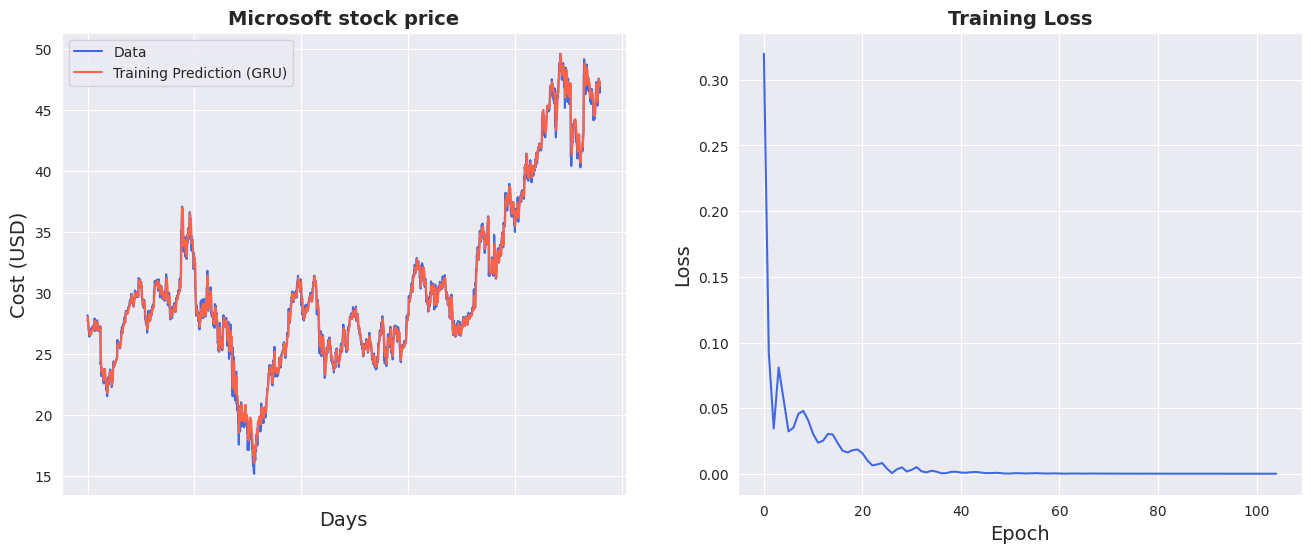

In [101]:

import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Microsoft stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

From the first subplot, we can see that, our predictions are quite similar to the original data. Also, from the second subplot, we can see that, loss was higher for starting epochs, as model gets trained, loss decreases.

### Prediction

Next, we will make the predictions using test data. We will also calculate RMSE for both training and test datasets and then we will use those values for further analysis or reporting. The RMSE is a measure of the model's accuracy, with lower values indicating better performance.

In [102]:

import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.57 RMSE
Test Score: 3.07 RMSE


### Testing Visulizations

After that, we will prepare data for plotting time series predictions, combining the original data with model predictions for visualization.

In [103]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_microsoft)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_microsoft)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_microsoft)-1, :] = y_test_pred

original = scaler.inverse_transform(price_microsoft['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

Next, we will create an interactive plot using Plotly to visualize the predictions of an IBM stock price model alongside the actual values. The plot consists of line plots for training predictions, test predictions, and actual values. It also features a dark theme and a title annotation for clarity and aesthetics.

In [106]:

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Microsoft Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

From this, we can say that, test predictions and actual value are little bit different over the period.

# Conclusion

The stock market analysis project, which focuses on four major companies—Amazon, Google, Microsoft, and IBM — has been an extensive exploration into the dynamics of financial markets.

In conclusion, the stock market analysis project for Amazon, Google, Microsoft, and IBM showcases the power of data-driven insights and predictive modeling in the financial domain. While it offers valuable tools for decision-making, users should exercise caution, consider market risks, and continuously update their strategies to adapt to changing market conditions. This project serves as a foundation for further research and analysis in the field of financial data science.